<a href="https://colab.research.google.com/github/A-Hoshor/MLA_ADH/blob/main/FinalProject_Regression_ADH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Regression #  
**Alyssa Hoshor**  

###Standard Imports

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [83]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Imports for specific models

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

###Imports for Splitting Data and Building Pipeline

In [85]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

####Imports for Performance Measures

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay

In [166]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

##Problem One

###Reading the Data

In [87]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/real_estate.csv')

In [88]:
df.rename(columns={"X1 transaction date": "transaction_date", "X2 house age" : "house_age", "X3 distance to the nearest MRT station" : "mrt_distance", "X4 number of convenience stores" : "convenience_stores", "X5 latitude" : "latitude", "X6 longitude" : "longitude", "Y house price of unit area" : "house_price_unit_area"}, inplace=True)

###Statistical and Visual Exploration

In [89]:
df.describe()

,No,transaction_date,house_age,mrt_distance,convenience_stores,latitude,longitude,house_price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


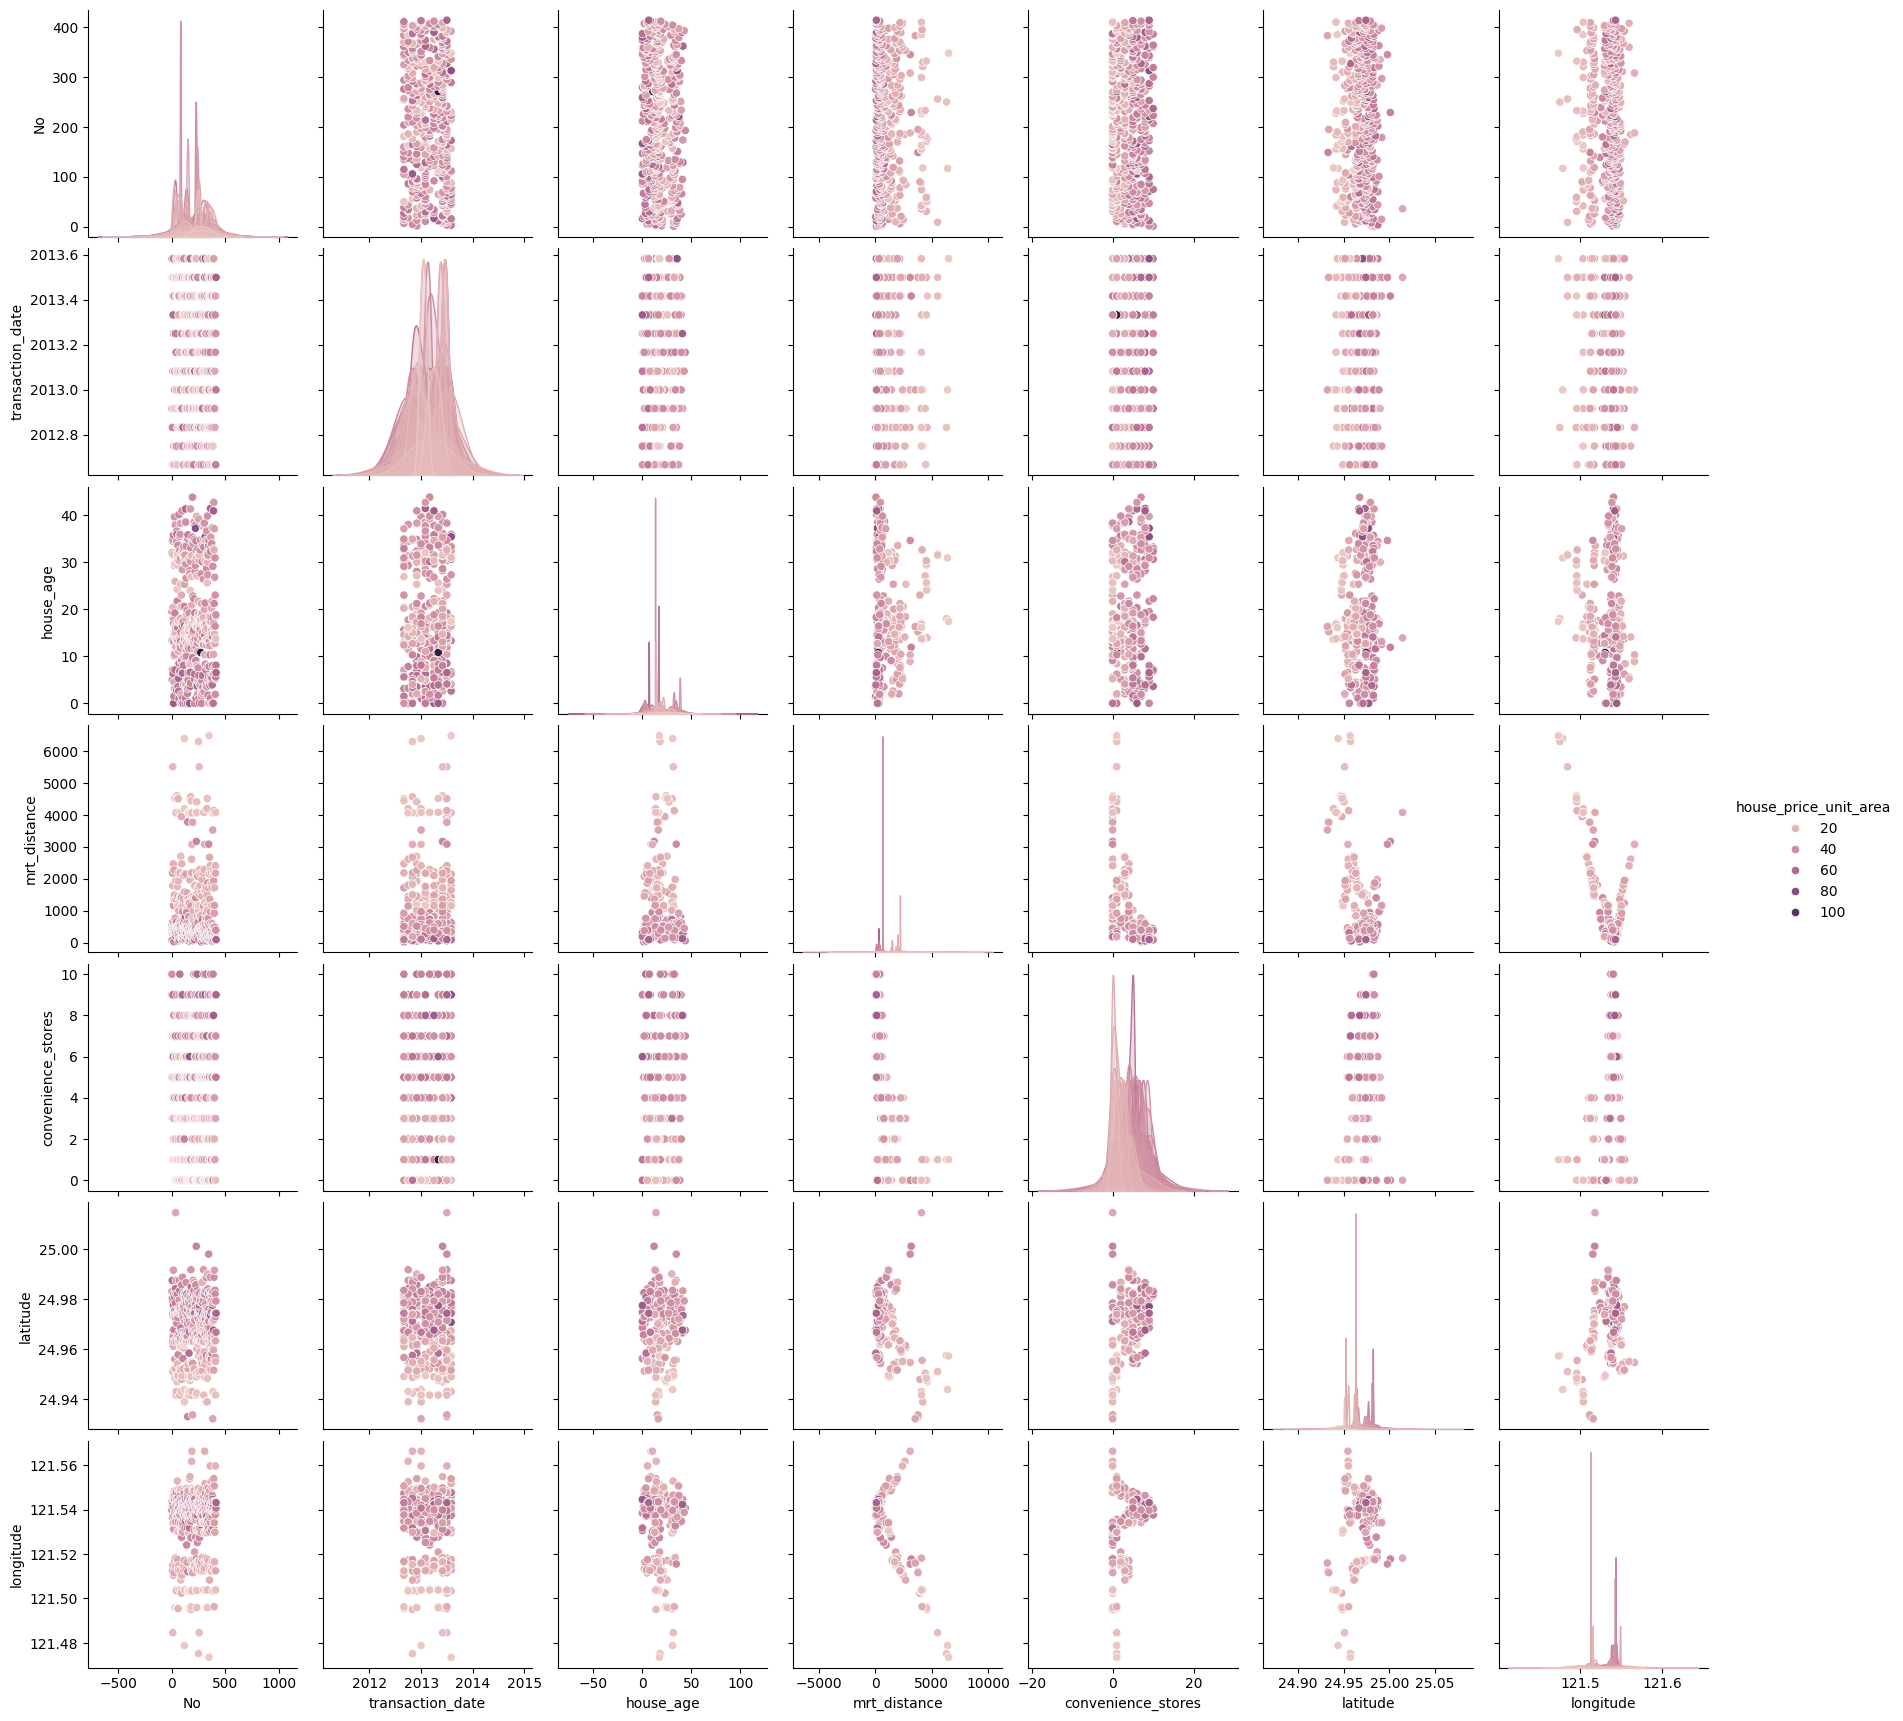

In [90]:
sns.pairplot(data=df,hue='house_price_unit_area')

###Split into Test/Train

In [91]:
X = df.iloc[:,0:-1]
y=df[['house_price_unit_area']]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

###Executing the Model

In [93]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

###Evaluating the Model

In [94]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

In [95]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

8.855254359931832
8.463966180308415


In [96]:
r2_score(y_test, y_test_pred)

0.61125245639822

In [97]:
lr_model.score(X_test,y_test)

0.61125245639822

###Conclusion

####Our mean squared errors are not are pretty close so our data is consistent. As far as our r2 score, it is at 0.61, so it is just OK at capturing the variation.

###Problem 2 - Support Vector Machine

###Reading the Data

In [98]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/titanic.csv')

###Statistical and Visual Exploration

In [99]:
survived = df['Survived'].groupby(df['Survived']).count()

Text(0, 0.5, 'Amount')

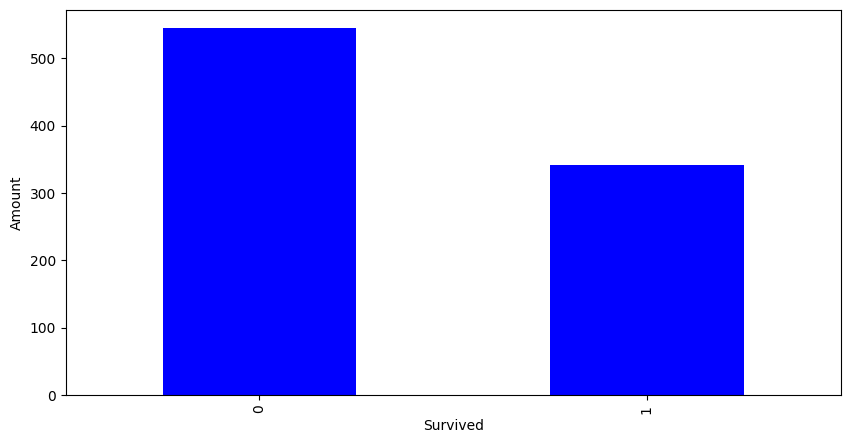

In [100]:
bar_plot = survived.plot(kind='bar', color='blue', figsize=(10,5))
bar_plot.set_xlabel('Survived')
bar_plot.set_ylabel('Amount')

###Building the Pipeline

In [120]:
df.rename(columns={"Survived": "survived", "Pclass" : "class", "Age" : "age", "Siblings/Spouses Aboard" : "sib/spouse", "Parents/Children Aboard" : "par_child", "Fare" : "fare"}, inplace=True)

In [102]:
df.drop(['Name'], axis=1, inplace=True)

In [121]:
df

,survived,class,Sex,age,sib/spouse,par_child,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [122]:
X = df[['class', 'age', 'sib/spouse', 'par_child', 'fare', 'Sex']]
y = df[['survived']]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.20, random_state=0)

In [145]:
num_attribs = ['class', 'age', 'sib/spouse', 'par_child', 'fare']
cat_attribs = ['Sex']

In [146]:
num_attribs

['class', 'age', 'sib/spouse', 'par_child', 'fare']

In [147]:
col_transform = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_attribs),
        ('cat', OneHotEncoder(), cat_attribs)
    ],
)

In [148]:
pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVCLinear', SVC(kernel="linear", C=1, max_iter=100000)),
                     ])

In [149]:
pipeline

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['class', 'age', 'sib/spouse',
                                                   'par_child', 'fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex'])])),
                ('SVCLinear', SVC(C=1, kernel='linear', max_iter=100000))])

###Executing the Model

In [150]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['class', 'age', 'sib/spouse',
                                                   'par_child', 'fare']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex'])])),
                ('SVCLinear', SVC(C=1, kernel='linear', max_iter=100000))])

###Evaluating the Model

In [151]:
y_pred = pipeline.predict(X_test)

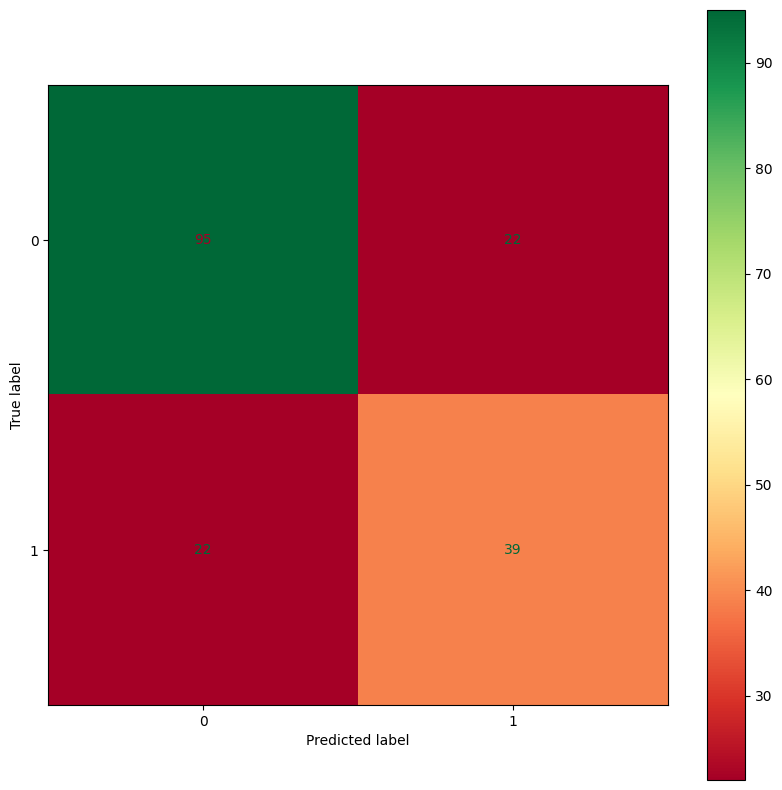

In [155]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='RdYlGn')


In [158]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [159]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

0.45378831671747644
0.49718307617612556


In [160]:
r2_score(y_test, y_test_pred)

-0.09737985147821226

In [161]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred))

Precision:  0.639344262295082
Recall:  0.639344262295082
F1 score:  0.639344262295082


Conclusion
####Our data is pretty consistent with little difference between our training and test mean squared errors being .45 and .49 respectively.
####Our data is not great at predicting the survivors of the Titanic, with our precision at 0.63, recall at 0.63 and F1 score at .63. Given the nature of surviving a ship sinking, this is not surprising.
####our r2 score being negative 0.09 means that our model is not that good at predicting someone surviving vs just randomly guessing.